# Compartmental models in epidemiology 

**Authors:** J.H. Cao 
<br>
**Supervisors:** prof.dr.ir. N.A.W. van Riel, dr. D. Bosnacki
<br>
**Deparment:** Biomedical Engineering, Computational Biology Group at Eindhoven University of Technology

This notebook contain the codes to model and simulate an epidemic. The focus is on **_two popular models_** used for the mathematical modelling of an infectious disease.

The two models are: 
<br>

1. **SIR model without vital dynamics, usually for the modelling of flu or epidemic**
2. **SEIR model, above model with an extra compartment "E"xposed**

 More specifically, these models will be used to model the spread of **COVID-19** in the Netherlands. Furhtermore, with the **SEIR** model, it a possible to get an estimate of the number of people exposed to COVID-19 ( _this is an estimate, the true number can only be verified with testing_ ). 
<br><br>
With these models, it is also possible to analyse whether a "lockdown" has any effect on the course/spread of this virus.


##### NOTE: THE PARAMETERS A CHOSEN RANDOMLY, NOT YET ESTIMATED !! (for testing the models and plots)

## Imports 

This section is for the import of the important python packages needed to develop these models.

In [1]:
%matplotlib inline 

from scipy.integrate import odeint # This package is needed since we are dealing with oridnary differential equations
import numpy as np
import matplotlib.pyplot as plt


## SIR model - the very basic epidemic model

For the **SIR** model, there are 3 differntial equations:

![](./sir_model.png)

_Source:_ https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

From above picture, we would define a function that will wrap up all three differntial equations:

In [2]:
### The input (for sanity):

#  y = the differential equations wrapped up
#  dS_dt = dS/dt 
#  dI_dt = dI/dt
#  dR_dt = dR/dr 
#  t = time 
#  beta = number of people an infected person can infect 
#  gamma = recovery rate which is 1/D, with D = incubation time
#  N = Number of people / population 
#  S = susceptible (number of people that are prone to infection)
#  I = number of infected 
#  R = number of recovered patients 


In [3]:
def diff_sir(y, t, N, beta, gamma):
    S, I, R = y # local variables for the S, I and R and wrapped in y 
    
    
    dS_dt = -beta * S * (I / N)
    dI_dt = beta * S * (I / N) - gamma * I
    dR_dt = gamma * I

    return dS_dt, dI_dt, dR_dt

#### Plotting the results 

In [4]:
def plot_sirmodel(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    
  ax.set_xlabel('Time (days)', fontsize=15)
  ax.set_ylabel("Number of people", fontsize=15)
  ax.set_title("SIR model", fontsize=20, weight='bold')
  
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  legend = ax.legend()
  legend.get_frame().set_alpha(1.0)
#   plt.savefig("sir_simulation.png")
  
  plt.show();

In [5]:
# Important parameters that can be estimated with parameter estimation and current data 

N = 17000000     # rough estimate of population in the Netherlands
beta = 1         # Assuming it infects only 1 person per day
D = 14           # estimated time that the patient is still sick and can infect (incubation time of 14 days) 
gamma = 1.0 / D

# R0 = 2.24
# beta = R0 * gamma  # R0 = Reproductive number of COVID-19


# Time 

nrdays = 100     # here the estimation is for 100 days 
t = np.linspace(0, nrdays, nrdays) 

# initial values 

S_initial = N-1         # beginning of epidemic: S = N-1, one infected, but the rest remain susceptible
I_initial = 1           # One infected at the start 
R_initial = 0           # No recovered at the beginning 

y_initial = S_initial, I_initial, R_initial 

In [6]:
# Solving the ODE and returning a matrix for the nr of days (t)

diff_matrix_sir = odeint(diff_sir, y_initial, t, args=(N, beta, gamma))
S, I, R = diff_matrix_sir.T

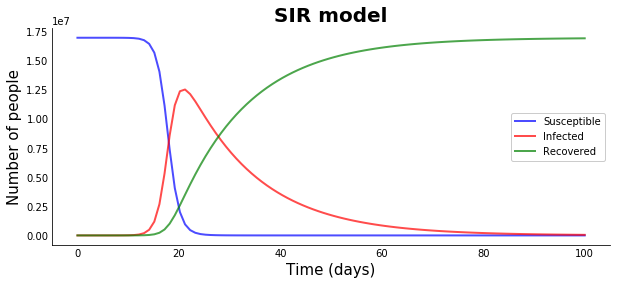

In [7]:
# Plotting results using function defined earlier 

plot_sirmodel(t, S, I, R)

<br>

## SEIR model - Adding extra compartment "E"xposed

For the **SEIR** model, there are 4 differntial equations:

![](./seir_model.PNG)

_Source:_ https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

In [8]:
# alpha = 1 / incubation_time
# mu    = death_rate


def diff_seir(y, t, N, beta, gamma, alpha, mu):
    S, E, I, R = y 
    
    # The 4 differential equations:
    
    dS_dt = mu * N - mu * S - beta * (I / N) * S
    dE_dt = beta * (I / N) * S - (mu + alpha) * E
    dI_dt = alpha * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R

    
    return dS_dt, dE_dt, dI_dt, dR_dt

In [9]:
def plot_seirmodel(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')  
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    
    
  ax.set_xlabel('Time (days)', fontsize=15)
  ax.set_ylabel("Number of people", fontsize=15)
  ax.set_title("SEIR model", fontsize=20, weight='bold')
  
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  legend = ax.legend()
  legend.get_frame().set_alpha(1.0)

  
  plt.show();

In [10]:
# Important parameters that can be estimated with parameter estimation and current data 

N = 17000000            # rough estimate of population in the Netherlands
beta = 1                # Assuming it infects only 1 person per day
D = 7                   # estimated time that the patient is still sick and can infect 
incubation_time = 14    # incubation time of COVID-19
gamma = 1.0 / D
mu    = 0.03            # The death rate of COVID-19
alpha = 1 / incubation_time 


# beta = ((R0 * (mu + alpha)) / alpha) * (mu + gamma) # R0 = reproductive number of COVID-19 when beta is unknown

# Time 

nrdays = 365     # here the estimation is for 1 year 
t = np.linspace(0, nrdays, nrdays) 

# initial values 

S_initial = N-1         # beginning of epidemic: S = N-1, one infected, but the rest remain susceptible
E_initial = 1           # Number of exposed at the beginning
I_initial = 1           # One infected at the start 
R_initial = 0           # No recovered at the beginning 


y_initial = S_initial, E_initial, I_initial, R_initial

In [11]:
# Solving the ODE and returning a matrix for the nr of days (t)

diff_matrix_seir = odeint(diff_seir, y_initial, t, args=(N, beta, gamma, alpha, mu))
S, E, I, R = diff_matrix_seir.T

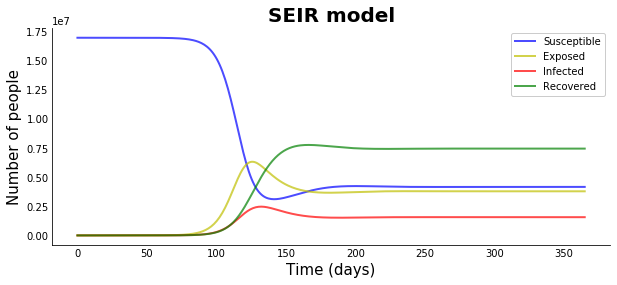

In [12]:
plot_seirmodel(t, S, E, I, R)

<br>

## SEIR(D) model - Not taking vital dynamics into account, but deaths are

In [13]:
# alpha = 1 / incubation_time
# mu    = death_rate


def diff_seird(y, t, N, beta, gamma, delta, mu, rho):
    S, E, I, R, D = y 
    
    # The 4 differential equations:
    
    dS_dt =  - beta * (I / N) * S
    dE_dt = beta * (I / N) * S - delta * E
    dI_dt = delta * E - (1 - mu) * gamma *  I - mu * rho * I
    dR_dt = (1 - mu) * gamma * I
    dD_dt = mu * rho * I 
    
    return dS_dt, dE_dt, dI_dt, dR_dt, dD_dt

In [14]:
def plot_seirdmodel(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')  
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deceased')
    
    
  ax.set_xlabel('Time (days)', fontsize=15)
  ax.set_ylabel("Number of people", fontsize=15)
  ax.set_title("SEIR(D) model", fontsize=20, weight='bold')
  
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  legend = ax.legend()
  legend.get_frame().set_alpha(1.0)
#   plt.savefig("seird_simulation.png")
  
  plt.show();

In [15]:
# Important parameters that can be estimated with parameter estimation and current data 

N = 17000000            # rough estimate of population in the Netherlands
beta = 1                # Assuming it infects only 1 person per day
D = 7                   # estimated time that the patient is still sick and can infect 
incubation_time = 14    # incubation time of COVID-19
gamma = 1.0 / D
mu    = 0.12            # The death rate of COVID-19
delta = 1 / incubation_time 
rho   = 1 / 100          # deceased in ICU pass away after 10 days

# R0 = 2.24
# beta = R0 * gamma # R0 = reproductive number of COVID-19 when beta is unknown

# Time 

nrdays = 365     # here the estimation is for 1 year 
t = np.linspace(0, nrdays, nrdays) 



# R0_start, k, lockdown_date, R0_end = 2.24, 0.1, 0, 0.8

# def logistic_R0(t):
#     return (R0_start-R0_end) / (1 + np.exp(-k*(-t+lockdown_date))) + R0_end

# def beta(t):
#     return logistic_R0(t) * gamma




# initial values 

S_initial = N-1         # beginning of epidemic: S = N-1, one infected, but the rest remain susceptible
E_initial = 1           # Number of exposed at the beginning
I_initial = 1           # One infected at the start 
R_initial = 0           # No recovered at the beginning 
D_initial = 0

y_initial = S_initial, E_initial, I_initial, R_initial, D_initial

In [16]:
# Solving the ODE and returning a matrix for the nr of days (t)

diff_matrix_seird = odeint(diff_seird, y_initial, t, args=(N, beta, gamma, delta, mu, rho))
S, E, I, R, D = diff_matrix_seird.T

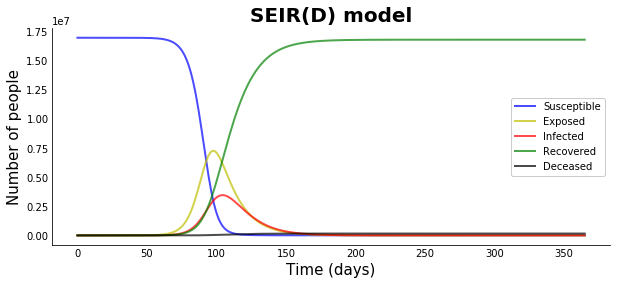

In [17]:
plot_seirdmodel(t, S, E, I, R, D)